# Part 1: Heterogeneous treatment effects using causal trees and forests
For this part, we will be using experimental data for computing heterogeneous effects through causal trees and forests. For all exercises, the predictors $X$ are all variables that are not the outcome $Y$ or the treatment $D$.

### 1.1. Load the data (1 points). 
This is data for and experiment regarding the National Supported Work Demonstration (NSW) job-training program. You can find the data here, and read a description of the data here. For further details of the experiment and the program, you can use this link

In [105]:
df <- read.csv("/Users/gabriel/Documents/GitHub/CausalAI-Course/Labs/Assignment/Assignment_5/data/experimental/experimental_control.csv")
df

treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,37,11,1,0,1,1,0,0,9930.0459
1,22,9,0,1,0,1,0,0,3595.8940
1,30,12,1,0,0,0,0,0,24909.4492
1,27,11,1,0,0,1,0,0,7506.1460
1,33,8,1,0,0,1,0,0,289.7899
1,22,9,1,0,0,1,0,0,4056.4939
1,23,12,1,0,0,0,0,0,0.0000
1,32,11,1,0,0,1,0,0,8472.1582
1,22,16,1,0,0,0,0,0,2164.0220


### 1.2. Find the ATE (1.5 points). 
With `re78` as the outcome variable of interest, find the Average Treatment Effect of participation in the program. Specifically, you should find it by calculating the difference between the means of the treatment group and the control group (the Simple Difference of Means or SDM). What can you say about the program?

In [106]:
# Hallamos el ATE
model <- lm(re78 ~ treat, data = df)

summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4554.801,408.0459,11.162474,1.154114e-25
treat,1794.342,632.8534,2.835321,4.787530e-03


### 1.3. Heterogeneous effects with causal trees (3 points). 
Use causal trees like we saw in class. For Python, you should use the `econml` package; for R, use the `grf` package; and for Julia, you will need to create the auxiliary variable $Y$∗ and fit a decision tree regressor. Report the splits the tree finds and interpret them.

In [107]:
X <- setdiff(names(df), c("treat", "re78"))
X

[1] "age"      "educ"     "black"    "hisp"     "marr"     "nodegree" "re74"    
[8] "re75"

,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,pscore
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,37,11,1,0,1,1,0,0,9930.0459,0.4021026
2,1,22,9,0,1,0,1,0,0,3595.8940,0.2466787
3,1,30,12,1,0,0,0,0,0,24909.4492,0.5594795
4,1,27,11,1,0,0,1,0,0,7506.1460,0.3526728
5,1,33,8,1,0,0,1,0,0,289.7899,0.4096518
6,1,22,9,1,0,0,1,0,0,4056.4939,0.3802885


Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`)."


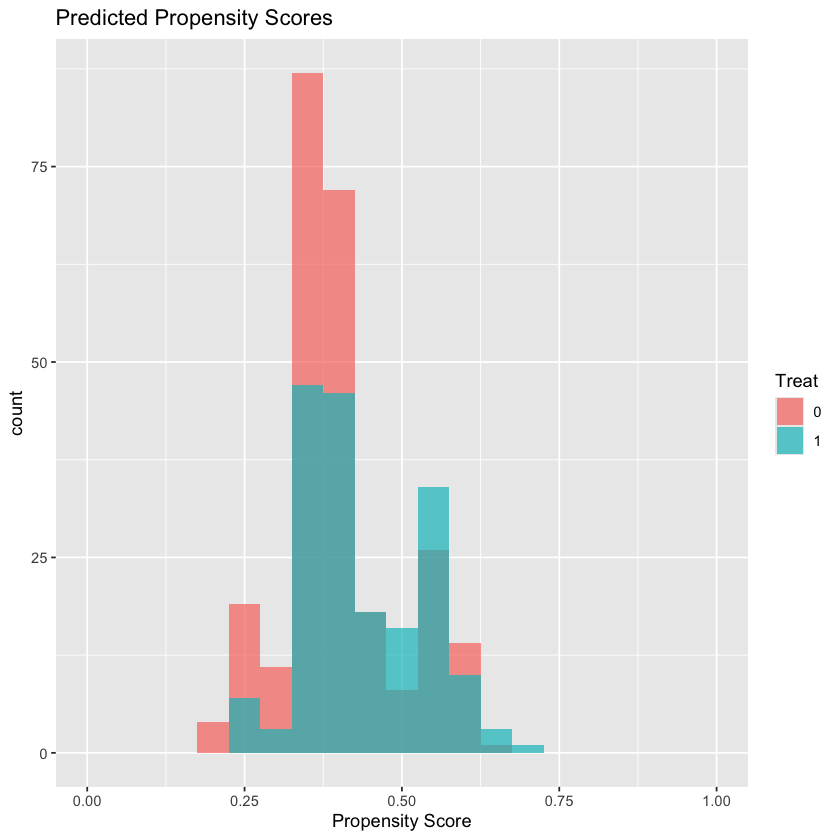

In [108]:
# Fit the logistic regression model to predict propensity scores
logistic_model <- glm(treat ~ ., data = df[,c(X,'treat')], family = binomial)
df$pscore <- predict(logistic_model, df[X], type = "response")
head(df)

library(ggplot2)
ggplot(df, aes(x = pscore, fill = as.factor(treat))) +
  geom_histogram(binwidth = 0.05, position = "identity", alpha = 0.7) +
  labs(
    title = "Predicted Propensity Scores",
    x = "Propensity Score",
    fill = "Treat"
  ) +
  xlim(0, 1)

In [109]:
df$y_star <- df$re78 / (df$treat * df$pscore - (1 - df$treat) * (1 - df$pscore))
mean(df$y_star, na.rm = TRUE)
df

[1] 1613.135

treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,pscore,y_star
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,37,11,1,0,1,1,0,0,9930.0459,0.4021026,24695.3033
1,22,9,0,1,0,1,0,0,3595.8940,0.2466787,14577.2364
1,30,12,1,0,0,0,0,0,24909.4492,0.5594795,44522.5448
1,27,11,1,0,0,1,0,0,7506.1460,0.3526728,21283.5954
1,33,8,1,0,0,1,0,0,289.7899,0.4096518,707.4054
1,22,9,1,0,0,1,0,0,4056.4939,0.3802885,10666.8845
1,23,12,1,0,0,0,0,0,0.0000,0.5513589,0.0000
1,32,11,1,0,0,1,0,0,8472.1582,0.3580540,23661.6754
1,22,16,1,0,0,0,0,0,2164.0220,0.4791392,4516.4784


In [111]:
# Correr una vez esta parte
X <- df[,X] 
Y <- df[,"y_star"]
D <- df[,"treat"]

In [112]:
library(grf)
tree <- causal_forest(X, Y, D, num.trees = 1,
                      mtry = ncol(X))

get_tree(tree, 1)

GRF tree object 
Number of training samples: 222 
Variable splits: 
(1) split_variable: re75  split_value: 377.569 
  (2) split_variable: educ  split_value: 11 
    (4) split_variable: educ  split_value: 9 
      (8) split_variable: age  split_value: 25 
        (10) * num_samples: 19  avg_Y: -3698.09 avg_W: 0.26 
        (11) * num_samples: 7  avg_Y: 1256.23 avg_W: 0.43 
      (9) split_variable: age  split_value: 24 
        (12) * num_samples: 14  avg_Y: -3073.93 avg_W: 0.07 
        (13) * num_samples: 22  avg_Y: 1007.69 avg_W: 0.32 
    (5) * num_samples: 11  avg_Y: 11584.65 avg_W: 0.73 
  (3) split_variable: re75  split_value: 1468.38 
    (6) * num_samples: 11  avg_Y: 712.43 avg_W: 0.36 
    (7) * num_samples: 27  avg_Y: 6923.17 avg_W: 0.59 

#### The tree is divided into 6 splits based on 1975 earnings, years of education and age. We see that the NSW work program is designed primarily for people with high years of education and age above 24, and that it is also primarily dependent on the results obtained in 1975. For earnings below 377,564 the following occurs: the younger the workers are and the fewer years of education they have, the negative causal effect of treatment is, with a low probability of these individuals being treated. For higher years of education, but less than 11 years, the above relationship holds. After 11 years of education, age is no longer relevant, the probability of being treated increases and the causal effect is 11,584.65, showing that the program mainly benefits people with a high level of education for the year 1978. On the other hand, if individuals had a high performance in 1975, it can be divided into those who exceeded 1,468.38 thousand dollars, with a medium probability of being treated and with a CATE of 6,923.17, and those who did not, with a probability of 0.36 of being treated and with a CATE of 712.43.

#### In summary, according to the results of the earnings of 1978, the work program helps mainly individuals with good results starting their new jobs, highly educated individuals and individuals older than 24 years. Most did not do so well at the beginning, and from there everything depended on the level of education, then on age. For those who did well, it depended on their performance level in 1975.

### 1.4. Heterogeneous effects with causal forests (3 points). 
Use causal forests like we saw in class. For Python, you should use the `econml` package; for R, use the `grf` package; and for Julia, you will need to use the auxiliary variable $Y$ ∗ computed in the previous exercise and fit a random forest regressor. Report the importance of the prediction variables.

In [113]:
cf <- causal_forest(X, Y, D)
cf_smalltrees <- causal_forest(X, Y, D)
tree <- get_tree(cf_smalltrees, 1)
tree

GRF tree object 
Number of training samples: 222 
Variable splits: 
(1) split_variable: age  split_value: 23 
  (2) split_variable: re75  split_value: 1713.15 
    (4) split_variable: black  split_value: 0 
      (8) * num_samples: 2  avg_Y: -13701.74 avg_W: 0 
      (9) split_variable: age  split_value: 18 
        (12) * num_samples: 13  avg_Y: 4853.9 avg_W: 0.46 
        (13) * num_samples: 20  avg_Y: 2328.35 avg_W: 0.5 
    (5) * num_samples: 10  avg_Y: -2271.93 avg_W: 0.3 
  (3) split_variable: educ  split_value: 11 
    (6) split_variable: re74  split_value: 0 
      (10) split_variable: educ  split_value: 10 
        (14) * num_samples: 20  avg_Y: -59.31 avg_W: 0.45 
        (15) * num_samples: 15  avg_Y: 6016.31 avg_W: 0.47 
      (11) * num_samples: 12  avg_Y: -848.3 avg_W: 0.33 
    (7) * num_samples: 19  avg_Y: 7133.24 avg_W: 0.74 

In [114]:
varimp <- variable_importance(cf)
ranked.vars <- order(varimp, decreasing = TRUE)
importances <- data.frame(variable = colnames(X)[ranked.vars], importance = varimp[ranked.vars])
importances

variable,importance
<chr>,<dbl>
age,0.34194852
re75,0.18949924
black,0.16179115
educ,0.14640666
re74,0.07687030
nodegree,0.04330033
marr,0.02970115
hisp,0.01048266


### 1.5. Plot heterogeneous effects (1.5 points). 
Plot how the predicted treatment effect changes depending on a variable of your choice. (You can see the last example in PD11 for clarification of what you should do in this exercise)

In [121]:
df$predicted_effects <- predict(cf, X)$predictions

# Aislamos efectos predichos por variable
predicted_effects_age <- aggregate(predicted_effects ~ age, data = df, mean)
df$re75_bins <- floor(df$re75 / 500) * 500 # modificamos variable re75 en intervalos de 500 porque es continua 
predicted_effects_re75 <- aggregate(predicted_effects ~ re75_bins, data = df, mean)
predicted_effects_black <- aggregate(predicted_effects ~ black, data = df, mean)
predicted_effects_educ <- aggregate(predicted_effects ~ educ, data = df, mean)

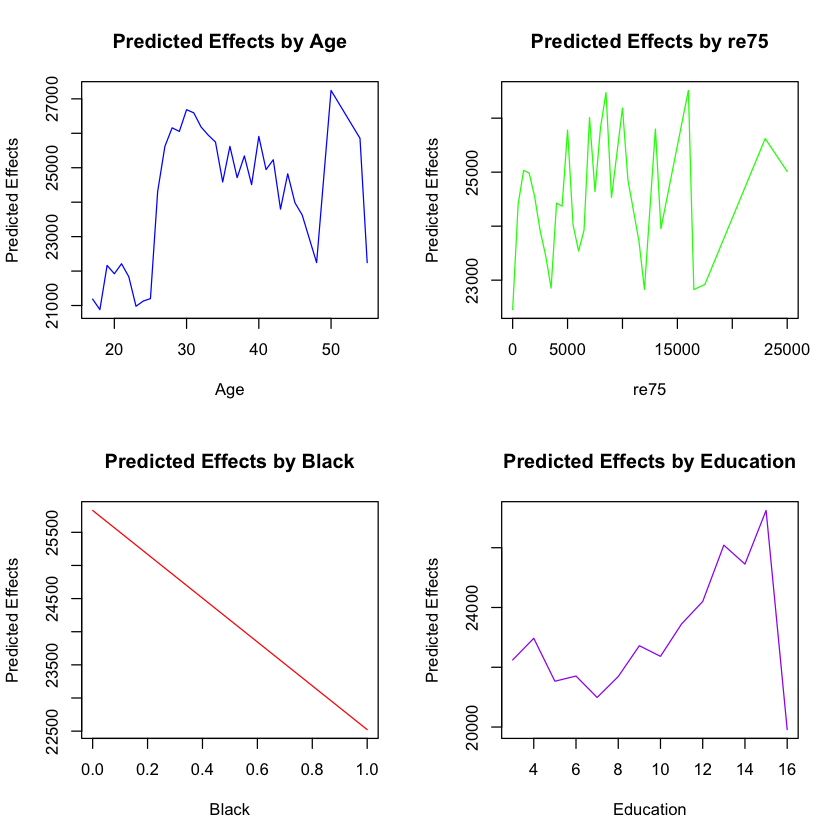

In [122]:
par(mfrow = c(2, 2))

# Predicted effects by age
plot(predicted_effects_age$age, predicted_effects_age$predicted_effects, type = "l", col = "blue",
     xlab = "Age", ylab = "Predicted Effects", main = "Predicted Effects by Age")

# Predicted effects by re75
plot(predicted_effects_re75$re75, predicted_effects_re75$predicted_effects, type = "l", col = "green",
     xlab = "re75", ylab = "Predicted Effects", main = "Predicted Effects by re75")

# Predicted effects by black
plot(predicted_effects_black$black, predicted_effects_black$predicted_effects, type = "l", col = "red",
     xlab = "Black", ylab = "Predicted Effects", main = "Predicted Effects by Black")

# Predicted effects by educ
plot(predicted_effects_educ$educ, predicted_effects_educ$predicted_effects, type = "l", col = "purple",
     xlab = "Education", ylab = "Predicted Effects", main = "Predicted Effects by Education")


# Part 2: Double/Debiased machine learning in observational data

In this part, we will be using observational data for computing the average treatment effect of the same program as in Part 1. This data is constructed by taking the treatment group from the same dataset as in Part 1, but constructing the control group from a different dataset; that is, the entirety of the control is comprised of observations from the Current Population Survey. Therefor, we may not have comparable treatment and control groups. To tackle this issue, we can use Double/Debiased machine learning.

### 2.1. Load the data (1 points). 

### 2.2. Group comparisons (1.5 points). 
For the treatment and control group separately, report summary statistics of three variables of your choice. Can you spot any big differences between the treatment and control groups?

### 2.3. Compute the SMD (1.5 points). 
Find the simple difference of means, which we can use as a naive estimate of the ATE. How does the result in this case compare to the result in point 1.2.?

### 2.4. Using DML (6 points). 
Use the DML procedure as we saw in the Lab, in order to find a better estimate of the ATE. You may use the `doubleML` packages for Python and R, but this package does not exist for Julia, so you will have to build your own procedure like we saw in class. You will be rewarded extra points for using more than one method for predictions. At the end, report the treatment effect you found, as well as the MSE for $D$ and $Y$ achieved by the method(s) you used.